# Korea University

## Mongo DB

#### NoSQL
기존 RDBMS의 초점은 트랜잭션을 통한 안정적인 데이터 관리에 초점,(싱글서버에서 잘 작동, 현재는 여러서버에서 분산처리를 통한 작업)  
현재의 작업을 하려니 문제가 발생해서 NoSQL이 탄생

* 기존 SQL의 문제
    1. 고정된 스키마(table, index 등을)
        * 데이터 사용하기전 스키마를 정의해야 했던 문제, 새 정보 들어올때 기존 데이터 타입과 안맞을 수 있음, 확장이 어려움
    2. Join 오퍼레이션
        * 서로의 키값으로 맞춰서 합치는데 데이터가 많아지면, 많은 시간이 소요가 됨
    3. ACID 트랜잭션(DB가 갖춰야할 속성), Atomicity, Consistency, Isolation, Durability

* Master Slave Replacation  
    Master가 모든 작업 총괄, Slave에 데이터 복제  
    slave에서 client가 읽을 수는 있지만 write는 불가능

#### 마스터-슬레이브 작업, 복제에 의한 확장
    1. 읽는 건 가능한데 쓰는 작업은 혼자 다하다 보니 마스터에 과부하가 걸림
    2. 슬레이브에 복제 하는데 걸리는 시간, 클라이언트가 슬레이브 데이터를 업데이트 안된상태에서 읽는다면 잘못된 정보를 보낼 수 있음
    3. 동일 데이터를 여러번 복제하기때문에 서버에 부담이됨

* 마스터-마스터 구조(거의 안씀)
     1. 동시에 쓰는 작업이 있으면 충돌이 일어남

* Sharding : 여러 서버에 분할해서 저장
    1. 문제1 : join하려면 전체데이터가 필요한데, 분할된 데이터라 별도의 application에 요청, app에 과부화 걸림
    2. 수동으로 처리해야 해서 복잡함
    

### Big Data는 CAP을 만족해야한다.
* Consistency:각각의 사용자가 항상 동일한 데이터를 조회해야함.  
* Availability:모든 사용자가 항상 읽고 쓸 수 있음  
* Partition Tolerance:분산 환경에서 시스템이 잘 동작   
##### 실제로는 모두 만족하는 것이 불가능, 하나는 포기해야한다.

### NoSQL
SQL interface를 지원하지 않은 오픈소스 RDB를 NoSQL이라 정의  
ACID 몇개 포기해서 새로운 DB System만들자!

No SQL  
Not only SQL  
NOn-relational operation database SQL 관계형이 아닌 새 구조를 제안한다

#### 집합지향모델 VS 그래프모델(SQL사용안함)

#### 키-값 모델  
순서 상관없이 넣어도 잘 들어감  
application에서 관리  


#### 문서모델(MongoDB) (위 모델보다 발전)

#### 컬럼-패밀리 모델
기존은 row로 관리했었음  
칼럼으로 관리, 새로운 스키마 적용 빠름  
읽고 쓸때는 row로 가져오니까 문제가 발생 (pandas는 칼럼 기준)

#### 그래프 모델
데이터 각각의 속성이 다름  
확장성이 높음  
그러나 각각 데이터의 관계를 설정해야 하기 때문에 복잡함  


##### 컬럼-패밀리, 키값모델, 문서모델 등은 분산관리가 편함

ACID 몇개 속성을 무시하면서 분산관리를 가능하게 만든 것이 NoSQL

## MongoDB

* 왜 쓰는가?
    - Cross-Platform 지원
    - 문서모델 기반
    - 퍼포먼스, 가용성, easy scalability
    - Bson이용(binary Json)=>Web이랑 연계하기 좋음
    

* 범용 데이터 베이스(Java API인 Mongus가 좋아서, RDBMS처럼 사용, API가 잘 정의되어 있음, 자체적으로 Join을 만들어버림, 지금은 MongoDB도 만듬) 
* Schema 디자인이 유연함
    - 속성을 정의하지 않기 때문에 자유롭게 데이터 수정 가능
* 풍부한 기능
    - 맵리듀스, 등 다양한 기능을 지원하기 때문에 여러 application에 적합(기존 RDB 기능 지원)
* 확장성 및 load balancing
    - 심지어 자동으로 data balancing, 개발에 용이, 굉장히 쉽게 자동으로 shading할 수 있음

#### 단점
* 스키마가 없어서 app이 관리 제대로 못하면 DB처리가 복잡해짐
* ACID 일부 포기하면서 수평적 확장성 제공
* 금융 등의 분야에서 ACID 미지원은 치명적
* Rollback 기능도 부족해 데이터 손실의 위험을 가지고 있음

##### Collection 내의 document는 서로 다른 schema를 가질 수 있음
새 값 넣을 때 새로운 필드만 넣으면 되기 때문에, 쉽게 추가 가능  
물론 app에서 고려할게 많아짐

In [ ]:
db.reateUser({user:'root',
             pwd:'root', roles:["root"]});
show users

In [ ]:
use user_in
show users
db.createUser({user:"new",
               pwd:"new",
               roles:["dbAdmin",
                      "readWrite"]})

In [ ]:
use newDB
show users
db.createUser({user:"newadmin",
               pwd:"newadmin",
               roles:["dbAdmin",
                      "readWrite"]})


In [ ]:
mongo -u "newadmin" -p "newadmin" --authenticationDatabase "newDB"


In [ ]:
db.createCollection('feed',{max:1000});


In [ ]:
db.user.save([{name:'user01', ID:'id001', PW:'1234', email:'01@mail.com'},
             {name:'user02', ID:'id002', PW:'12345', email:'02@mail.com'},
             {name:'user03', ID:'id003', PW:'123456', email:'03@mail.com'},
             {name:'user04', ID:'id004', PW:'1234567', email:'04@mail.com'}]);

### 비교연산자  

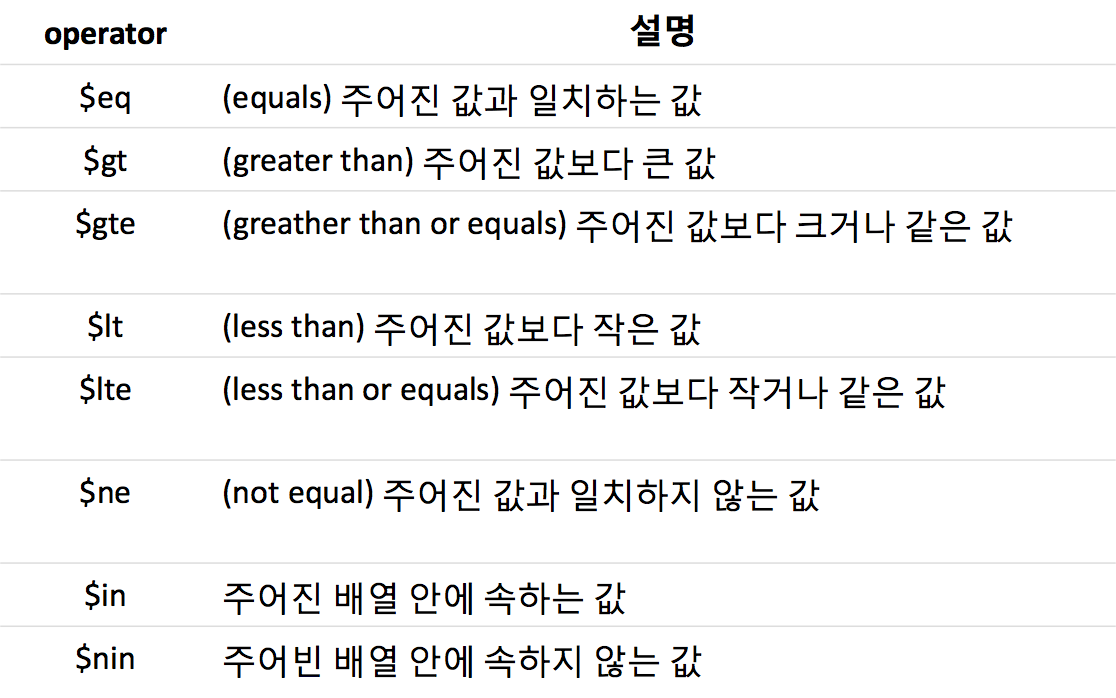

In [ ]:
db.testdecimal.insertMany([ {_id:1, value:9.9, description: "double"}, 
                           {_id:2, value:NumberDecimal(9.9), description:"decimal" }, 
                           {_id:3, value:10, description:"double"}, 
                           {_id:4, value:NumberInt(10), description:'int'},
                           {_id:5, value:NumberDecimal(10.00000000), description:'decimal'}]);

db.testdecimal.find({value:10})  
{ "_id" : 3, "value" : 10, "description" : "double" }  
{ "_id" : 4, "value" : 10, "description" : "int" }  
{ "_id" : 5, "value" : NumberDecimal("10.0000000000000"), "description" : "decimal" }  
#### 왜 3 4 5 다 나올까

>숫자를 만들때 int는 모든값이 다 0이 들어오면 0으로 판단하고, 1이 들어오면 1로 판단, 10들어오면 2로 판단  
float는 한곳을 잘라서 지수를 판단 2^n제곱, 나머지에는 실제 숫자 데이터가 들어감    
9.9는 9.9로 저장이 안되고 9.89999973.....으로 저장됨, 올림해서 9.9로 표현  
double은 64개 decimal은 128개가 됨, decimal은 좀 더 정확히 표현가능  
000은 아무런 문제가 없음, int와 같게 표현

#### 정수 꼴의 data는 type이 달라도 값으로 find 가능

JS지원하기 때문에 쉘안에서 코드작업 가능  
>var dc = db.testdecimal  
dc.find()

db.item.find().sort({price:-1})  
1은 오름차순, -1은 내림차순

regex사용가능  
db.item.find({name :/item[1-3]/}).count();


save가 일종의 update를 한다.

update하면 document 자체를 업데이트 시킨다.  
같은 값인 것을 수정하면 상위단의 값만 수정이 된다

upsert: 찾아보고 없으면 추가해준다

unset :해당 정보 없애기

$inc: 해당 셀에 +원하는 값해주기  

$mul : 곱하기 원하는 값

In [ ]:
db.user.updateOne({title:'another post'}, {$rename:{emial:'email'}});

db.post.updateOne({title:'another post'}, {$rename:{data:'date'}}); 잘못친 data를 date로 바꾸기  
하지만, 바꾸면 순서가 뒤로 밀림

db.testlist.insertMany([{_id:1, list:[1,2,3,4]},   
{_id:2, list:['a','b','c','d']},   
{_id:3, doc:[{name:'A',price:100},{name:'B',price:200}]}]);  


push는 값 넣어주기  
pull은 값 빼기

add_item = function() {  
... for (count = 0 : count < 10000:count++) {  
... db.item.insertOne({name:'item '+count, price : NumberInt(Math.random()*50000)};)}};

index지우기 : dropindex

db.item.totalindexSize():index의 총합 크기  


과제설명

db.createCollection('contracts',
{validator: {$or:
[
{phone: {$type:'string'}},
{email: {$regex:/@mongodb\.com$/}},
{status: {$in:['Unknown', 'Incomplete']} }
]
}
})

collenction에 다 넣을 수 있음   
여러 사람들어가게 어떻게 만드는가?  
주소1 주소 2 주소3,   
주소:["string", "string", "tring]  
validator: 참 거짓 확인  
$and:[]리스트 안 의값 확인,모두 참일때 데이터를 받음 $or:[]하나라도 참이면 데이터를 받음, 